# The Solow Model with Land

In this section of the code, we import the required libraries and Python scripts.

In [1]:
# Importing the relevant packages
import numpy as np
import sympy as sm
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from scipy.optimize import fsolve
import ipywidgets as widgets


# Importing the class Solowmodelkap7 from the py file
from modelprojectexam import Solowmodelkap7

# 1. Model description

We use Chapter 7.1 in Introducing Advanced Macroeconomics by Hans Jørgen Whitta-Jacobsen and Peter Birch Sørensen as our baseline model, which highlights the importance of a natural resource by emphasizing the role of land in the Solow model where we have the following equations:

\begin{aligned}
    Y_{t} &= K^{\alpha}_{t}(A_{t}L_{t})^{\beta}X^{\kappa}, \quad \alpha>0, \beta>0, \kappa>0, \alpha+\beta+\kappa=1 \hspace{4em} &(1)\\
    K_{t+1} &= sY_{t} + (1-\delta)K_{t}, \quad 0 < s < 1, 0 < \delta < 1, \quad K_{0} \text{ given}\hspace{4em} &(2)\\
    L_{t+1} &= (1+n)L_{t}, \quad n≥0,  \quad L_{0} \text{ given}\hspace{4em} &(3)\\
    A_{t+1} &= (1+g)A_{t}, \quad g≥0, \quad A_{0}  \text{ given} \hspace{4em} &(4)
\end{aligned}

1. The first equation is a Cobb-Douglas aggregate production function with land and exogenous constant technical coefficients $\alpha$, $\beta$ and $\kappa$. The input X of land does not carry a time subscript since land is in fixed supply. The production function have constant return to scale for $K_{t}$, $L_{t}$ and X. However, when one of the three factors are constant over time there is diminishing returns to scale for the other factors.<br>
2. The second equation is the capital accumulation equation, assuming given rates of gross investments in capital and of depreciation. <br>
3. Equation (3) and (4) assume given growth rates for the labour force, $L_{t}$, and for the labour-augmenting productivity factor, $A_{t}$. Thus n is the growth rate of the labour force, and g reflects the rate of labour-augmenting technological progress. We assume both of these rates are at least zero. <br>




Analysing the sources of economic growth, we analyze the factors relative to the workers. Therefore, we define the output per worker as $y_t \equiv \frac{Y_t}{L_t}$, capital per worker as $k_t \equiv \frac{K_t}{L_t}$, and land per worker as $x_t \equiv \frac{X}{L_t}$. 

## 1.1 Income shares of production factors

In this section, we calculate the rent, wage and land by  maximizing the production function. Additionally, we show that the income shares of capital, labor, and land are respectively $\alpha$, $\beta$ and $\kappa$.

We use SymPy to calculate the derivative of the producers' profit function because it simplifies the code, ensures clarity and visualizes the math. Additionally, it does not require any external libraries.

In [2]:
# This line creates symbolic representation for various variables and parameters
z_t, Y_t, K_t, X, A_t, L_t, n, g, s, alpha, beta, delta, kappa, r_t, w_t, landrent_t = sm.symbols('z_t, Y_t, K_t, X, A_t, L_t, n, g, s, alpha, beta, delta, kappa, r_t, w_t, landrent_t', real=True, positive=True)

# This line defines the production function
production_function = K_t**alpha * (A_t*L_t)**beta * X**kappa

# These lines computes the partial derivative of the production function respect to capital, labour, and, land to find the rent of the capital, the wages, and, the rent of the land.
rent = sm.diff(production_function, K_t)
wages = sm.diff(production_function, L_t)
landrent = sm.diff(production_function, X)

# To show the equations for rent, wages and landrent, we create them as an equation:
display_rent = sm.Eq(r_t, rent)
display_wages = sm.Eq(w_t, wages)
display_landrent = sm.Eq(landrent_t, landrent)

# Command for displaying in SymPy format
display(display_rent, display_wages, display_landrent)

Eq(r_t, K_t**alpha*X**kappa*alpha*(A_t*L_t)**beta/K_t)

Eq(w_t, K_t**alpha*X**kappa*beta*(A_t*L_t)**beta/L_t)

Eq(landrent_t, K_t**alpha*X**kappa*kappa*(A_t*L_t)**beta/X)

In [3]:
# Then we would like to substistute the production function with Y_t
rent = rent.subs(production_function, Y_t)
wages = wages.subs(production_function, Y_t)
landrent = landrent.subs(production_function, Y_t)

# Again, we create equations for rent, wages and landrent:
display_rent = sm.Eq(r_t, rent)
display_wages = sm.Eq(w_t, wages)
display_landrent = sm.Eq(landrent_t, landrent)

# Display rent and wages in SymPy format
display(display_rent, display_wages, display_landrent)

Eq(r_t, Y_t*alpha/K_t)

Eq(w_t, Y_t*beta/L_t)

Eq(landrent_t, Y_t*kappa/X)

We have now shown that the income shares of capital, labour and land ($r_{t}K_{t}/Y_{t}$, etc.) are $\alpha$, $\beta$ and $\kappa$, respectively, so the model is one of constant income shares.

## 1.2 Solving the Steady-State

The Solow model with land can be analyzed directly in terms of the capital-output ratio, $z_{t}≡K_{t}/Y_{t}=k_{t}/y_{t}$, for which we want to establish convergence to a constant steady state (SS) level. We will start by using the transition equation for $z_{t}$:
\begin{aligned}
    z_{t+1} &= \left(\frac{1}{(1+n)(1+g)}\right)^{\beta}[s+(1-\delta)z_{t}]^{1-\alpha}z_{t}^{\alpha} \hspace{4em} &(8)
\end{aligned}

To show that the transition equation converge to a particular and constant SS level, meaning $z_{t_+1}=z_{t}=z^{*}$ from any strictly positive initial level, we demonstrate that the equation satisfies the inada conditions. 

Inada condition, 1: z(t+1) at z_t=0: 0
Inada condition, 2: Derivative of z(t+1) with respect to z_t is positive for all z_t > 0: (alpha*z_t**alpha*(s - z_t*(delta - 1))**(2 - alpha) + z_t**(alpha + 1)*(alpha - 1)*(delta - 1)*(s - z_t*(delta - 1))**(1 - alpha))/(z_t*((g + 1)*(n + 1))**beta*(s - z_t*(delta - 1))) > 0


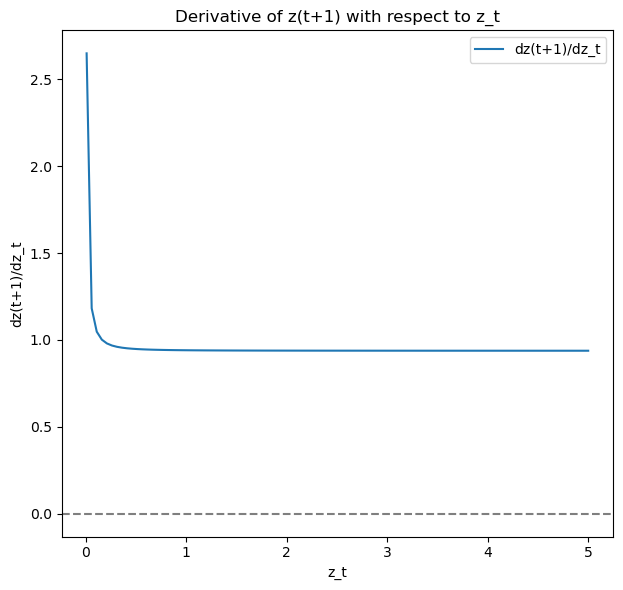

In [7]:
# Define the transition equation
z_t_plus_1_expr = (1 / ((1 + n) * (1 + g)))**beta * (s + (1 - delta) * z_t)**(1 - alpha) * z_t**alpha

# This line computes the derivative the partial derivative of the production function respect to capital-output ratio in period t.
z_t_plus_1_derivative = sm.diff(z_t_plus_1_expr, z_t)

# Simplifing the derivative
z_t_plus_1_derivative_simplified = sm.simplify(z_t_plus_1_derivative)

# Inada condition, 1: Check if the function passes through (0, 0)
z_t_at_zero = z_t_plus_1_expr.subs(z_t, 0)
print(f"Inada condition, 1: z(t+1) at z_t=0: {z_t_at_zero}")

# Inada condition, 2: Check if the function is strictly increasing
derivative_positive = sm.simplify(z_t_plus_1_derivative > 0)
print(f"Inada condition, 2: Derivative of z(t+1) with respect to z_t is positive for all z_t > 0: {derivative_positive}")

# Inada condition, 3: Check for exactly one strictly positive intersection with the 45° line which we will show by calculate the SS solution. 

# Inada condition, 4: limit of the derivative as z_t approaches 0 and infinity. 
# The following code, illustrating the derivative of transition equation is provided by OpenAI (2024) ChatGPT 4o.
# "
# Define parameters
param_values = {
    s: 0.2,
    n: 0.005,
    g: 0.02,
    delta: 0.06,
    alpha: 0.2,
    beta: 0.6
}

# Substitute parameter values into the transition equation and its derivative
z_t_plus_1_expr = z_t_plus_1_expr.subs(param_values)
z_t_plus_1_derivative_simplified = z_t_plus_1_derivative_simplified.subs(param_values)

# Define functions for numerical evaluation
z_t_plus_1 = sm.lambdify(z_t, z_t_plus_1_expr, 'numpy')
derivative_z_t_plus_1 = sm.lambdify(z_t, z_t_plus_1_derivative_simplified, 'numpy')

# Generate values for z_t
z_t_values = np.linspace(0.01, 5.0, 100)  # Avoid z_t = 0 to prevent division by zero

# Calculate z(t+1) and its derivative for the range of z_t values
z_t_plus_1_values = z_t_plus_1(z_t_values)
derivative_values = derivative_z_t_plus_1(z_t_values)

# Plotting the derivative of z(t+1) with respect to z_t
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
plt.plot(z_t_values, derivative_values, label='dz(t+1)/dz_t')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.title('Derivative of z(t+1) with respect to z_t')
plt.xlabel('z_t')
plt.ylabel('dz(t+1)/dz_t')
plt.legend()

plt.tight_layout()
plt.show()
# " 

Thus, we see that the transition equation satisfies three of the Inada conditions: it passes through (0,0), it is positive for all $z_t > 0$ and when $z_t \rightarrow 0$, $z_{t+1} \rightarrow \infty$.

The last propertie of the transtion curve is the curve only has one strictly positive intersection with the 45-degree-line which we show by solving the transition equation. To do that we do following in the py.file: 

Creating a class Solowmodelkap7 with:
1. Parameter values (and initial values for the simulation). 
2. Creating the capital-output transition equation.
3. Creating the function for scipy optimizer. 

The Multi_hybr function is used to determine the SS value of z. It leverages the Scipy optimization library, which provides a suite of tools for minimizing or maximizing objective functions. Scipy's optimize module includes solvers for a variety of problems, such as nonlinear optimization, linear programming, constrained and nonlinear least-squares, root finding, and curve fitting. For our purposes, we use the default method "hybr". This method is a modification of the Powell hybrid method, combining Newton's method with a descent check. If Newton steps do not lead to a descent in the sum-of-squared-residuals, the method reverts to using the gradient of these residuals for optimization.

In [ ]:
# 2. Create an instance of the class
mp = Solowmodelkap7()

# 3. Call the multi_hybr method to solve for the steady state
steady_state_z, residual = mp.multi_hybr()

# 4. Print the steady state value and residual
print("The unique SS solution value for the capital-output ratio is", steady_state_z[0], "solved by the MultiHybr function.")

## 1.3 Graphical solution

In this section, we graphically demonstrate how the transition equation for the capital-output ratio, 𝑧, converges to a specific and constant steady state level, 𝑧∗ Additionally, we visually illustrate the properties of the transition curve: it passes through the origin (0,0), is strictly increasing everywhere, and intersects the 45-degree line at exactly one point where it is strictly positive.

In [ ]:
# This function defines the transition equation 
def equation(beta, alpha, delta, n, g, s, z):
    z_next = ((1 / ((1 + n) * (1 + g))) ** beta) * (s + (1 - delta) * z) ** (1 - alpha) * z ** alpha
    return z_next

# Function to find the intersection point
def find_intersection(beta, alpha, delta, n, g, s):
    func = lambda z: equation(beta, alpha, delta, n, g, s, z) - z
    z_intersect = fsolve(func, 1.0)[0]  # Use 1.0 as an initial guess
    return z_intersect

# The following code, illustrating the transition equation is provided by OpenAI (2024) ChatGPT 4o.
# "
def plot_graph(beta, alpha, delta, n, g, s):
    z = np.linspace(0, 4, 100)
    z_next = equation(beta, alpha, delta, n, g, s, z)
    
    plt.figure(figsize=(8, 6))
    plt.clf()  # Clear the current figure to avoid overlapping plots

    # Plot the transition equation and the 45-degree line
    plt.plot(z, z_next, label='Transition equation')
    plt.plot(z, z, 'r--', label='45-degree line')
    
    # Find and plot the intersection point
    z_intersect = find_intersection(beta, alpha, delta, n, g, s)
    plt.scatter(z_intersect, z_intersect, color='blue', zorder=5)
    plt.text(z_intersect, z_intersect, f'({z_intersect:.2f}, {z_intersect:.2f})', fontsize=12, ha='left')
    
    # Writing plot aesthetic such as labels, title, legend, and axes limits.
    plt.xlabel('$z_{t}$')
    plt.ylabel('$z_{t+1}$')
    plt.title('Transition equation vs 45-degree line')
    plt.legend()
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    
    plt.show()

# Define sliders with default values
beta_slider = FloatSlider(min=0, max=2, step=0.1, value=mp.par.beta_val, description='beta');
alpha_slider = FloatSlider(min=0, max=1, step=0.1, value=mp.par.alpha_val, description='alpha');
delta_slider = FloatSlider(min=0, max=1, step=0.01, value=mp.par.delta_val, description='delta');
n_slider = FloatSlider(min=0, max=1, step=0.001, value=mp.par.n_val, description='n');
g_slider = FloatSlider(min=0, max=1, step=0.01, value=mp.par.g_val, description='g');
s_slider = FloatSlider(min=0, max=1, step=0.01, value=mp.par.s_val, description='s');

# Create interactive plot
interact(plot_graph, beta=beta_slider, alpha=alpha_slider, delta=delta_slider, 
         n=n_slider, g=g_slider, s=s_slider);
# ""


## 1.4 Simulation of growth path 

In this section, we simulate the growth paths of the technology-adjusted output and capital per capita, wage, rent and landrent. In period 100, we simulate a shock to the growth in y by indcreasing X. 


In [ ]:
# 1. Calling class
mp = Solowmodelkap7()

# The following code, illustrating the growth in y is provided by OpenAI (2024) ChatGPT 4o.
# "
# 2. Setting the slider parameters
shock_slider = widgets.FloatSlider(
                min=100, max=150, step=10, value=100, description="X:",continuous_update=True)

# 3. Defining the slider 
def shock_update(shock):
    mp.X_shock(shock)
    # Clearing y_growth list to allow for new values
    plt.show()

# 4. Adding the sliders to our diagram
widgets.interact(shock_update, shock=shock_slider);
# "

# 2 Adding Exhaustible Natural Resources

Land is not the only significant natural resource in aggregate production. Other crucial nonrenewable resources include oil, gas, coal, metals, and non-metallic minerals. Unlike land, whose quantity remains constant during production, non-renewable resources diminish as they are utilized. This depletion implies a greater barrier to growth compared to land. To explore this hypothesis, we plan to expand our Solow model, which currently includes land, to also account for exhaustible natural resources. We denote the total stock by R which each period will be reduced by the amount of E.

The model with land and exhustible natural resources will then be: 

\begin{aligned}
    Y_{t} &= K^{\alpha}_{t}(A_{t}L_{t})^{\beta}X^{\kappa}E_t^{\varepsilon}, \quad \alpha>0, \beta>0, \kappa>0, \varepsilon>0, \alpha+\beta+\kappa+ \varepsilon=1 \hspace{4em} &(1)\\
    K_{t+1} &= sY_{t} + (1-\delta)K_{t}, \quad 0 < s < 1, 0 < \delta < 1, \quad K_{0} \text{ given}\hspace{4em} &(2)\\
    L_{t+1} &= (1+n)L_{t}, \quad n≥0,  \quad L_{0} \text{ given}\hspace{4em} &(3)\\
    A_{t+1} &= (1+g)A_{t}, \quad g≥0, \quad A_{0}  \text{ given} \hspace{4em} &(4)\\
    R_{t+1} &= R_t-E_t\\
    E_t &= \psi R_t \quad 0<\psi<1
\end{aligned}

Adding this to model
1. We enhance the Cobb-Douglas aggregate production function, which already includes land, by adding the variable, E, representing the amount of natural resources utilized.  <br>
4. The depletion of the natural resource, detailing the remaining stock, $R_{t+1}$ , after the natural resources are consumed in production at time, t. <br>
5. The consumption rate of the natural resource in production, which is a constant fraction of the remaining stock each period. <br>


## 2.1 Solving SS

Following the same steps as before to calculate the SS for the new transition equation: 

Creating a class Solowmodelkap7 with:
1. Parameter values (and initial values for the simulation). 
2. Creating the capital-output transition equation.
3. Creating the function for scipy optimizer. 

The new transition equation is given as

\begin{aligned}
    j_{t+1} &= \frac{1}{((1+n)(1+g))^{\beta}(1-\psi)^\epsilon}[s+(1-\delta)j_{t}]^{1-\alpha}j_{t}^{a} \hspace{4em} &(8)
\end{aligned}

Naming the capital-output ratio j in this version with exhaustible natural resources. 

In [ ]:
# 2. Create an instance of the class
mp = Solowmodelkap7()

# 3. Call the multi_hybr method to solve for the steady state
steady_state_j, residual = mp.multi_hybr1()

# 4. Print the steady state value and residual
print("The unique SS solution value for the capital-output ratio is", steady_state_j[0], "solved by the MultiHybr function.")

## 2.2 Graphical solution

Again, we graphically demonstrate how the transition equation for the capital-output ratio, j, converges to a specific and constant steady state level, j∗. 

In [ ]:
# This function defines the new transition equation
def new_equation(beta, alpha, delta, n, g, s, j, psi, epsilon):
    j_next = ((1 / ((1 + n) * (1 + g))) ** beta) * (1 - psi) ** epsilon * (s + (1 - delta) * j) ** (1 - alpha) * j ** alpha
    return j_next

# Function to find the intersection point
def find_new_intersection(beta, alpha, delta, n, g, s, psi, epsilon):
    func = lambda j: new_equation(beta, alpha, delta, n, g, s, j, psi, epsilon) - j
    j_intersect = fsolve(func, 1.0)[0]  # Use 1.0 as an initial guess
    return j_intersect

# The following code, illustrating the transition equation for the extended model is provided by OpenAI (2024) ChatGPT 4o.
# "
def plot_new_graph(beta, alpha, delta, n, g, s, psi, epsilon):
    j = np.linspace(0, 4, 100)
    j_next = new_equation(beta, alpha, delta, n, g, s, j, psi, epsilon)
    
    plt.figure(figsize=(8, 6))
    
    # Plot the transition equation and the 45-degree line
    plt.plot(j, j_next, label='Transition equation')
    plt.plot(j, j, 'r--', label='45-degree line')
    
    # Find and plot the intersection point
    j_intersect = find_new_intersection(beta, alpha, delta, n, g, s, psi, epsilon)
    plt.scatter(j_intersect, j_intersect, color='blue', zorder=5)
    plt.text(j_intersect, j_intersect, f'({j_intersect:.2f}, {j_intersect:.2f})', fontsize=12, ha='left')
    
    # Writing plot aesthetic such as labels, title, legend, and axes limits.
    plt.xlabel('$j_{t}$')
    plt.ylabel('$j_{t+1}$')
    plt.title('Transition equation vs 45-degree line')
    plt.legend()
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    
    plt.show()

# Define sliders with default values
beta_slider = FloatSlider(min=0, max=2, step=0.1, value=0.6, description='beta')
alpha_slider = FloatSlider(min=0, max=1, step=0.1, value=0.2, description='alpha')
delta_slider = FloatSlider(min=0, max=1, step=0.01, value=0.06, description='delta')
n_slider = FloatSlider(min=0, max=1, step=0.001, value=0.005, description='n')
g_slider = FloatSlider(min=0, max=1, step=0.01, value=0.02, description='g')
s_slider = FloatSlider(min=0, max=1, step=0.01, value=0.2, description='s')
psi_slider = FloatSlider(min=0, max=1, step=0.01, value=0.05, description='psi')
epsilon_slider = FloatSlider(min=0, max=1, step=0.01, value=0.1, description='epsilon')

# Create interactive plot
interact(plot_new_graph, beta=beta_slider, alpha=alpha_slider, delta=delta_slider, 
         n=n_slider, g=g_slider, s=s_slider, psi=psi_slider, epsilon=epsilon_slider);
# "

# 3 Conclusion 

In this project, we explored the Solow model with land and its implications using Python. We implemented the Solow Model with land and its extensions (natural resource), analyzing steady states, dynamics, and the impact of different parameters on economic growth. 

The interactive plots and simulations provided insights into how changes in savings rates, population growth, and technological progress can affect the long-term economic output. 

In the Solow model with land we calculate the SS value of capital-output to 2.54 and when we extend the model with natural resource the capital-output SS value falls to 2.34. 